In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [2]:
manual1 = pd.read_excel('sample_subset_chembl35_blind_broad.xlsx', skiprows=1)

In [3]:
manual1.head()

,assay_id,assay_type,description,broad
0,2240177,B,Induction of HDAC4 degradation in human HL-60 ...,Protein activity
1,1708538,B,Binding affinity to ACTR3 in human NCI-H23 cel...,Binding
2,1837015,B,Inhibition of recombinant human TRKC (510 to e...,Protein activity
3,46520,B,Inhibitory concentration of compound required ...,Protein activity
4,533526,B,Inhibition of human trypsin at 100 uM,Protein activity


In [4]:
manual1['broad'].drop_duplicates()

0           Protein activity
1                    Binding
9        Radioligand binding
18                     Other
35    Antimicrobial activity
38            Cell phenotype
39            in vivo method
Name: broad, dtype: object

In [5]:
manual2 = pd.read_excel('sample_subset2_chembl35_blind_2_broad.xlsx', skiprows=1)

In [6]:
manual2.head()

,assay_id,assay_type,description,broad
0,1586235,B,Displacement of [3H]8-OH-DPAT from human recom...,Radioligand binding
1,1586152,B,Inhibition of recombinant human C-terminal His...,Protein activity
2,2284101,B,Binding affinity to human recombinant ALK L119...,Protein activity
3,1515453,B,Binding affinity to dopamine D4 receptor (unkn...,Radioligand binding
4,1675172,B,Inhibition of human partial length PIK3CA Q546...,Binding


In [7]:
manual2['broad'].drop_duplicates()

0        Radioligand binding
1           Protein activity
4                    Binding
10                     Other
34    Antimicrobial activity
37            in vivo method
41            Cell phenotype
Name: broad, dtype: object

In [8]:
combined_manual = pd.concat([manual1, manual2])

In [9]:
len(combined_manual)

200

In [10]:
combined_manual['broad'].value_counts()

broad
Protein activity          46
Cell phenotype            43
Antimicrobial activity    42
in vivo method            29
Other                     19
Binding                   11
Radioligand binding       10
Name: count, dtype: int64

In [11]:
predictions = pd.read_csv('validation200_broad_unblinded.csv')

In [12]:
predictions.head()

,assay_id,year,description,assay_type,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity,predicted_cat,prediction_score,second_largest_score
0,456385,2007.0,Ex vivo anticoagulant potency in rat plasma as...,F,0.000044,1.687743e-05,5.459509e-07,1.000000,0.000004,4.804565e-07,7.503688e-07,in vivo method (BAO_0040021),1.000000,0.000044
1,2157929,2021.0,Binding affinity to NanoLuc human A1 adenosine...,B,0.000539,9.998216e-01,5.657545e-06,0.000027,0.000099,4.513950e-05,2.979177e-05,Binding (BAO_0002989),0.999822,0.000539
2,1907545,2019.0,Growth inhibition of human MOLT4 cells incubat...,F,0.000056,2.949883e-05,3.026868e-06,0.000037,0.999995,4.579080e-05,2.272898e-04,Cell phenotype (BAO_0002542),0.999995,0.000227
3,2265211,2022.0,Antagonist activity at human P2Y6R expressed i...,B,0.000005,3.201314e-06,9.999920e-01,0.000004,0.000010,4.184967e-06,2.981297e-06,Protein activity (BAO_0013016),0.999992,0.000010
4,1614150,2016.0,Displacement of [125I]-p-iodoclonidine from I1...,B,0.999999,9.383160e-07,6.163500e-06,0.000014,0.000009,1.372803e-05,6.848240e-07,Radioligand binding (BAO_0002776),0.999999,0.000014


In [13]:
predictions['predicted_cat'].drop_duplicates()

0          in vivo method (BAO_0040021)
1                 Binding (BAO_0002989)
2          Cell phenotype (BAO_0002542)
3        Protein activity (BAO_0013016)
4     Radioligand binding (BAO_0002776)
11               Antimicrobial activity
27                 Nucleic acid binding
Name: predicted_cat, dtype: object

In [14]:
replacement_dict = {
    'Radioligand binding': 'Radioligand binding (BAO_0002776)'
    , 'Protein activity': 'Protein activity (BAO_0013016)'
    , 'Binding': 'Binding (BAO_0002989)'
    , 'in vivo method': 'in vivo method (BAO_0040021)'
    , 'Cell phenotype': 'Cell phenotype (BAO_0002542)'
}

In [15]:
def replace_names(x):
    try:
        new_value = replacement_dict[x]
        return new_value
    except KeyError:
        return x
        

In [16]:
combined_manual['manual_cat'] = combined_manual['broad'].apply(lambda x: replace_names(x))

In [17]:
combined_manual[['broad', 'manual_cat']].drop_duplicates()

,broad,manual_cat
0,Protein activity,Protein activity (BAO_0013016)
1,Binding,Binding (BAO_0002989)
9,Radioligand binding,Radioligand binding (BAO_0002776)
18,Other,Other
35,Antimicrobial activity,Antimicrobial activity
38,Cell phenotype,Cell phenotype (BAO_0002542)
39,in vivo method,in vivo method (BAO_0040021)


In [18]:
def determine_second_category(row):
    cats = ['Radioligand binding (BAO_0002776)', 'Binding (BAO_0002989)',
       'Protein activity (BAO_0013016)', 'in vivo method (BAO_0040021)',
       'Cell phenotype (BAO_0002542)', 'Nucleic acid binding',
       'Antimicrobial activity']
    values = row[cats]
    for number, value in enumerate(values):
        if row['second_largest_score'] == value:
            return cats[number]

In [19]:
predictions['second_predicted_cat'] = predictions.apply(determine_second_category, axis=1)

In [20]:
predictions.head()

,assay_id,year,description,assay_type,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity,predicted_cat,prediction_score,second_largest_score,second_predicted_cat
0,456385,2007.0,Ex vivo anticoagulant potency in rat plasma as...,F,0.000044,1.687743e-05,5.459509e-07,1.000000,0.000004,4.804565e-07,7.503688e-07,in vivo method (BAO_0040021),1.000000,0.000044,Radioligand binding (BAO_0002776)
1,2157929,2021.0,Binding affinity to NanoLuc human A1 adenosine...,B,0.000539,9.998216e-01,5.657545e-06,0.000027,0.000099,4.513950e-05,2.979177e-05,Binding (BAO_0002989),0.999822,0.000539,Radioligand binding (BAO_0002776)
2,1907545,2019.0,Growth inhibition of human MOLT4 cells incubat...,F,0.000056,2.949883e-05,3.026868e-06,0.000037,0.999995,4.579080e-05,2.272898e-04,Cell phenotype (BAO_0002542),0.999995,0.000227,Antimicrobial activity
3,2265211,2022.0,Antagonist activity at human P2Y6R expressed i...,B,0.000005,3.201314e-06,9.999920e-01,0.000004,0.000010,4.184967e-06,2.981297e-06,Protein activity (BAO_0013016),0.999992,0.000010,Cell phenotype (BAO_0002542)
4,1614150,2016.0,Displacement of [125I]-p-iodoclonidine from I1...,B,0.999999,9.383160e-07,6.163500e-06,0.000014,0.000009,1.372803e-05,6.848240e-07,Radioligand binding (BAO_0002776),0.999999,0.000014,in vivo method (BAO_0040021)


In [21]:
merged_df = combined_manual.merge(predictions, on=['assay_id', 'description', 'assay_type'])

In [22]:
len(merged_df)

200

In [23]:
merged_df.drop(labels=['broad','Radioligand binding (BAO_0002776)', 'Binding (BAO_0002989)',
       'Protein activity (BAO_0013016)', 'in vivo method (BAO_0040021)',
       'Cell phenotype (BAO_0002542)', 'Nucleic acid binding',
       'Antimicrobial activity'], axis='columns', inplace=True)

In [24]:
merged_df.sort_values(by='prediction_score', ascending=False, inplace=True)

In [25]:
merged_df.head()

,assay_id,assay_type,description,manual_cat,year,predicted_cat,prediction_score,second_largest_score,second_predicted_cat
90,2148298,F,Antiosteoporotic activity against OVX-induced ...,in vivo method (BAO_0040021),2021.0,in vivo method (BAO_0040021),1.0,0.000047,Radioligand binding (BAO_0002776)
160,1515666,F,Induction of diuresis in mongrel dog at 3 mg/k...,in vivo method (BAO_0040021),2015.0,in vivo method (BAO_0040021),1.0,0.000053,Radioligand binding (BAO_0002776)
54,913285,F,Antidiabetic activity in Rattus norvegicus Wis...,in vivo method (BAO_0040021),2011.0,in vivo method (BAO_0040021),1.0,0.000036,Radioligand binding (BAO_0002776)
63,456385,F,Ex vivo anticoagulant potency in rat plasma as...,Protein activity (BAO_0013016),2007.0,in vivo method (BAO_0040021),1.0,0.000044,Radioligand binding (BAO_0002776)
144,1839283,F,Antibacterial activity against Acinetobacter b...,Antimicrobial activity,2019.0,Antimicrobial activity,1.0,0.000007,in vivo method (BAO_0040021)


In [26]:
merged_df.tail()

,assay_id,assay_type,description,manual_cat,year,predicted_cat,prediction_score,second_largest_score,second_predicted_cat
131,105834,B,In vitro inhibitory concentration against huma...,Protein activity (BAO_0013016),2003.0,Protein activity (BAO_0013016),0.081626,0.030992,Cell phenotype (BAO_0002542)
110,2148810,B,Stabilization of human plasma TTR assessed as ...,Other,2021.0,Nucleic acid binding,0.081064,0.065778,Protein activity (BAO_0013016)
135,542049,F,Ex vivo inhibition of intracellular interferon...,Other,2003.0,Protein activity (BAO_0013016),0.028727,0.002884,in vivo method (BAO_0040021)
97,2275052,F,Antioxidant activity assessed as DPPH radical ...,Other,2020.0,Protein activity (BAO_0013016),0.024111,0.017978,in vivo method (BAO_0040021)
3,46520,B,Inhibitory concentration of compound required ...,Protein activity (BAO_0013016),2002.0,Protein activity (BAO_0013016),0.020367,0.019019,Antimicrobial activity


In [27]:
def determine_agreement(row):
    if row['manual_cat'] == row['predicted_cat']:
        return True
    else:
        return False

In [28]:
merged_df['agreement_manual_predicted'] = merged_df.apply(determine_agreement, axis=1)

In [29]:
merged_df.head()

,assay_id,assay_type,description,manual_cat,year,predicted_cat,prediction_score,second_largest_score,second_predicted_cat,agreement_manual_predicted
90,2148298,F,Antiosteoporotic activity against OVX-induced ...,in vivo method (BAO_0040021),2021.0,in vivo method (BAO_0040021),1.0,0.000047,Radioligand binding (BAO_0002776),True
160,1515666,F,Induction of diuresis in mongrel dog at 3 mg/k...,in vivo method (BAO_0040021),2015.0,in vivo method (BAO_0040021),1.0,0.000053,Radioligand binding (BAO_0002776),True
54,913285,F,Antidiabetic activity in Rattus norvegicus Wis...,in vivo method (BAO_0040021),2011.0,in vivo method (BAO_0040021),1.0,0.000036,Radioligand binding (BAO_0002776),True
63,456385,F,Ex vivo anticoagulant potency in rat plasma as...,Protein activity (BAO_0013016),2007.0,in vivo method (BAO_0040021),1.0,0.000044,Radioligand binding (BAO_0002776),False
144,1839283,F,Antibacterial activity against Acinetobacter b...,Antimicrobial activity,2019.0,Antimicrobial activity,1.0,0.000007,in vivo method (BAO_0040021),True


In [30]:
merged_df['prediction_score'].describe()

count    200.000000
mean       0.913532
std        0.224362
min        0.020367
25%        0.991243
50%        0.999982
75%        0.999997
max        1.000000
Name: prediction_score, dtype: float64

In [31]:
thresholds = [(0.01, 0.4), (0.4, 0.7),(0.7, 0.9), (0.9, 1)]
accuracies = []
lengths = []
for threshold in thresholds:
    temp_df = merged_df.loc[(merged_df['prediction_score']>threshold[0])&(merged_df['prediction_score']<=threshold[1])]
    lengths.append(len(temp_df))
    correct = temp_df.loc[temp_df['manual_cat']==temp_df['predicted_cat']]
    incorrect = temp_df.loc[temp_df['manual_cat']!=temp_df['predicted_cat']]
    accuracy = len(correct)/len(temp_df)*100
    accuracies.append(accuracy)

In [32]:
lengths

[13, 8, 11, 168]

In [33]:
frame = {'Threshold': ["(0.01, 0.4]", "(0.4, 0.7]", "(0.7, 0.9]", "(0.9, 1]"],
         'Accuracy': accuracies}
accuracy_data = pd.DataFrame(frame)

In [34]:
accuracy_data

,Threshold,Accuracy
0,"(0.01, 0.4]",30.769231
1,"(0.4, 0.7]",37.500000
2,"(0.7, 0.9]",72.727273
3,"(0.9, 1]",86.904762


In [35]:
accuracy_data.round(1)

,Threshold,Accuracy
0,"(0.01, 0.4]",30.8
1,"(0.4, 0.7]",37.5
2,"(0.7, 0.9]",72.7
3,"(0.9, 1]",86.9


In [37]:
accuracy_data.rename(columns={'Threshold': 'Prediction Score'}, inplace=True)

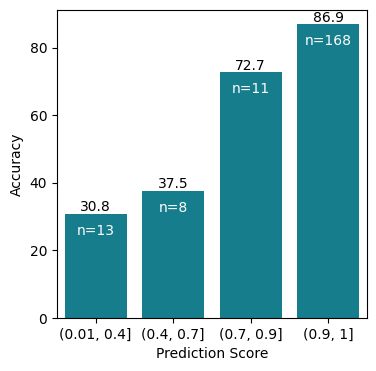

In [41]:
fig, ax = plt.subplots(figsize=(4, 4))
splot = sns.barplot(data=accuracy_data.round(1), x='Prediction Score', y='Accuracy', color='#028ca1')
for p, mylabel in zip(splot.patches, lengths):
    splot.annotate("n={}".format(mylabel), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10, color='white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')
for container in splot.containers:
    splot.bar_label(container)
fig.savefig("thresholds_validation_set.png", bbox_inches = "tight")

In [135]:
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99]
accuracies = []
for threshold in thresholds:
    temp_df = merged_df.loc[merged_df['prediction_score']>threshold]
    correct = temp_df.loc[temp_df['manual_cat']==temp_df['predicted_cat']]
    incorrect = temp_df.loc[temp_df['manual_cat']!=temp_df['predicted_cat']]
    accuracy = len(correct)/len(temp_df)*100
    accuracies.append(accuracy)

In [139]:
frame = {'Threshold': thresholds,
         'Accuracy': accuracies}
accuracy_data = pd.DataFrame(frame)

<Axes: xlabel='Threshold', ylabel='Accuracy'>

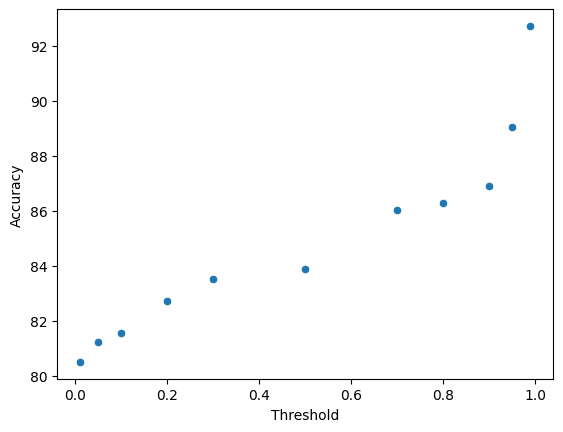

In [140]:
sns.scatterplot(data=accuracy_data, x='Threshold', y='Accuracy')

In [142]:
thresholds = [0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99]
fracs_incorrect = []
for threshold in thresholds:
    temp_df = merged_df.loc[merged_df['prediction_score']<threshold]
    correct = temp_df.loc[temp_df['manual_cat']==temp_df['predicted_cat']]
    incorrect = temp_df.loc[temp_df['manual_cat']!=temp_df['predicted_cat']]
    frac_incorrect = len(incorrect)/len(temp_df)*100
    fracs_incorrect.append(frac_incorrect)

In [143]:
frame = {'Threshold': thresholds,
         'Fraction incorrect': fracs_incorrect}
inaccuracy_data = pd.DataFrame(frame)

<Axes: xlabel='Threshold', ylabel='Fraction incorrect'>

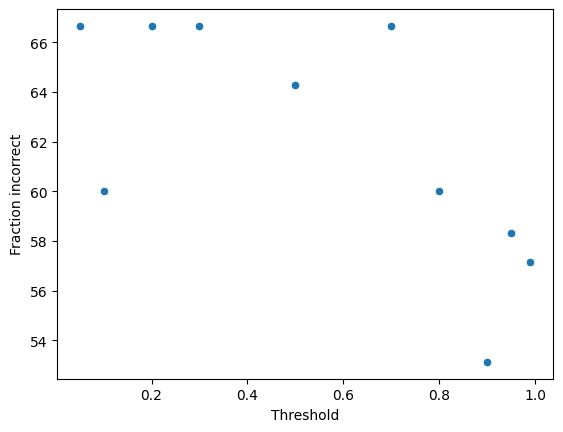

In [144]:
sns.scatterplot(data=inaccuracy_data, x='Threshold', y='Fraction incorrect')

In [106]:
len(high_conf)

179

In [107]:
high_conf = merged_df.loc[merged_df['prediction_score']>0.7]
y_true = high_conf['manual_cat']
y_pred = high_conf['predicted_cat']

In [110]:
high_conf['predicted_cat'].value_counts()

predicted_cat
Protein activity (BAO_0013016)       46
Antimicrobial activity               45
Cell phenotype (BAO_0002542)         40
in vivo method (BAO_0040021)         24
Binding (BAO_0002989)                12
Radioligand binding (BAO_0002776)    10
Nucleic acid binding                  2
Name: count, dtype: int64

In [108]:
categories = ['Protein activity (BAO_0013016)'
              , 'Cell phenotype (BAO_0002542)'
              , 'Antimicrobial activity'
              , 'in vivo method (BAO_0040021)'
              ,'Binding (BAO_0002989)'
              ,'Radioligand binding (BAO_0002776)'
           , 'Nucleic acid binding'
              , 'Other'
       ]

In [109]:
cm = confusion_matrix(y_true, y_pred, labels=categories)
print("Confusion Matrix:\n", cm)

precision = precision_score(y_true, y_pred, average=None, labels=categories)
recall = recall_score(y_true, y_pred, average=None, labels=categories)
accuracy = accuracy_score(y_true, y_pred)
print("Precision per class:", precision)
print("Recall per class:", recall)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[37  1  0  1  1  0  1  0]
 [ 2 38  0  1  0  0  0  0]
 [ 1  0 37  0  0  0  0  0]
 [ 2  1  1 21  0  0  0  0]
 [ 0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 4  0  7  1  0  0  1  0]]
Precision per class: [0.80434783 0.95       0.82222222 0.875      0.91666667 1.
 0.         0.        ]
Recall per class: [0.90243902 0.92682927 0.97368421 0.84       1.         1.
 0.         0.        ]
Accuracy: 0.8603351955307262


/hps/software/users/chembl/ines/assays_description/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/hps/software/users/chembl/ines/assays_description/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
high_conf['predicted_cat'].value_counts()

predicted_cat
Protein activity (BAO_0013016)       46
Antimicrobial activity               45
Cell phenotype (BAO_0002542)         40
in vivo method (BAO_0040021)         24
Binding (BAO_0002989)                12
Radioligand binding (BAO_0002776)    10
Nucleic acid binding                  2
Name: count, dtype: int64

#### Do some stats

In [28]:
merged_df.loc[merged_df['manual_cat']==merged_df['predicted_cat']]

,assay_id,assay_type_x,description_x,broad,manual_cat,year,description_y,assay_type_y,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity,predicted_cat,prediction_score,second_largest_score
1,1708538,B,Binding affinity to ACTR3 in human NCI-H23 cel...,Binding,Binding (BAO_0002989),2017.0,Binding affinity to ACTR3 in human NCI-H23 cel...,B,0.000495,0.999961,8.505132e-06,0.000659,3.711966e-04,3.026486e-04,8.754423e-05,Binding (BAO_0002989),0.999961,0.000659
2,1837015,B,Inhibition of recombinant human TRKC (510 to e...,Protein activity,Protein activity (BAO_0013016),2019.0,Inhibition of recombinant human TRKC (510 to e...,B,0.000009,0.000005,9.999962e-01,0.000003,1.071839e-07,9.576959e-06,4.971198e-05,Protein activity (BAO_0013016),0.999996,0.000050
3,46520,B,Inhibitory concentration of compound required ...,Protein activity,Protein activity (BAO_0013016),2002.0,Inhibitory concentration of compound required ...,B,0.000086,0.004876,2.036673e-02,0.000002,1.030713e-04,2.147260e-03,1.901946e-02,Protein activity (BAO_0013016),0.020367,0.019019
4,533526,B,Inhibition of human trypsin at 100 uM,Protein activity,Protein activity (BAO_0013016),2007.0,Inhibition of human trypsin at 100 uM,B,0.000047,0.000004,9.999969e-01,0.000005,1.139881e-06,5.753865e-06,8.350688e-06,Protein activity (BAO_0013016),0.999997,0.000047
5,2102748,B,Inhibition of equine serum BChE using butyrylt...,Protein activity,Protein activity (BAO_0013016),2021.0,Inhibition of equine serum BChE using butyrylt...,B,0.000069,0.000074,9.999324e-01,0.000026,2.907617e-06,1.340925e-04,1.023548e-04,Protein activity (BAO_0013016),0.999932,0.000134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,912337,F,Antiamnesic activity in scopolamine-induced am...,in vivo method,in vivo method (BAO_0040021),2012.0,Antiamnesic activity in scopolamine-induced am...,F,0.000017,0.000007,8.639789e-07,0.999999,7.303982e-06,5.044836e-07,5.129971e-07,in vivo method (BAO_0040021),0.999999,0.000017
195,1983534,F,Effect on cell cycle pathway in human T47D cel...,Cell phenotype,Cell phenotype (BAO_0002542),2020.0,Effect on cell cycle pathway in human T47D cel...,F,0.001705,0.000547,3.196381e-04,0.000320,9.913378e-01,1.328783e-03,1.125974e-04,Cell phenotype (BAO_0002542),0.991338,0.001705
197,987925,F,Induction of apoptosis in human EC109 cells as...,Cell phenotype,Cell phenotype (BAO_0002542),2013.0,Induction of apoptosis in human EC109 cells as...,F,0.000029,0.000005,2.762005e-06,0.000014,9.999938e-01,1.746263e-07,7.514590e-06,Cell phenotype (BAO_0002542),0.999994,0.000029
198,768145,F,Antiparasitic activity against Fasciola hepati...,in vivo method,in vivo method (BAO_0040021),2011.0,Antiparasitic activity against Fasciola hepati...,F,0.000039,0.000012,5.881536e-07,0.999999,5.838699e-06,2.691201e-07,1.362932e-06,in vivo method (BAO_0040021),0.999999,0.000039


In [29]:
161/200

0.805

In [44]:
len(merged_df.loc[(merged_df['prediction_score']<0.7)&(merged_df['manual_cat']!=merged_df['predicted_cat'])])

14

In [46]:
len(merged_df.loc[merged_df['prediction_score']<0.7])

21

In [34]:
179/200

0.895

In [36]:
len(merged_df.loc[(merged_df['prediction_score']>0.7)&(merged_df['manual_cat']==merged_df['predicted_cat'])])

154

In [37]:
154/179

0.8603351955307262

In [30]:
predictions['prediction_score'].describe()

count    200.000000
mean       0.913532
std        0.224362
min        0.020367
25%        0.991243
50%        0.999982
75%        0.999997
max        1.000000
Name: prediction_score, dtype: float64

In [47]:
# plot % correct with prediction score

In [14]:
predictions['second_largest_score'].describe()

count    200.000000
mean       0.009828
std        0.036311
min        0.000004
25%        0.000037
50%        0.000151
75%        0.002227
max        0.415641
Name: second_largest_score, dtype: float64